In [51]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as scio#导入需要使用的包
import pandas as pd 
import math
import random

In [52]:
# -----------------------------
# 数据预处理
# -----------------------------
data=scio.loadmat('notMNIST_small.mat') #使用scio 包中的loadmat读取数据

In [53]:
images=data['images']#读取后为字典 读取其中训练数据部分
labels=data['labels']#读取数据集的标签

In [54]:
test_split=0.2#训练集和测试集的划分 8/2划分
num_images =images.shape[2]#数据集中图片数量 后续要用
test_num=math.ceil(test_split*num_images)#切分出测试集数量 向上取整
train_num=num_images-test_num#训练集图片数量 便于后续取出
image=list()#初始化列表 后续存储读出来的图片

In [55]:
for i in range(num_images): #数据集格式转化 转化为我们预处理要用的 num_images*28*28 按照自己的预处理规则进行预处理
    image.append(images[:,:,i])#添加进列表
images=np.array(image)#转化为numpy类型

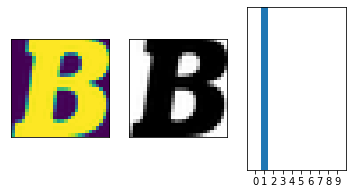

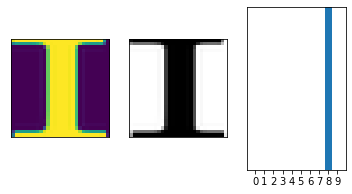

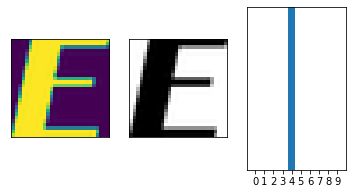

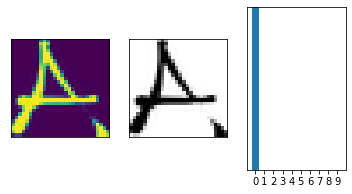

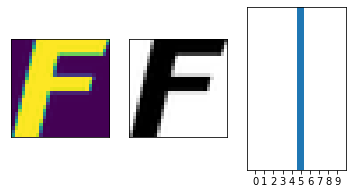

In [56]:
img_ran=random.sample(range(0,num_images), 5)#随机取5个图片并显示其标签
for n in img_ran:
    # 准备图
    plt.figure(figsize=(6,3))#设置图片格式
    img28x28 = images[n].reshape((28, 28))#reshape一下
    # 画数字图片
    plt.subplot(1, 3, 1)#绘制子图
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img28x28)#转化图片并绘制
    # 画数字图片
    plt.subplot(1, 3, 2)#绘制子图
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img28x28, cmap=plt.cm.binary)#转化二值化图片并绘制
    # 画预测可能性数值
    plt.subplot(1, 3, 3)
    plt.grid(False)
    plt.xticks(range(10))#设置横坐标
    plt.yticks([])
    label = keras.utils.to_categorical(labels[n], 10)#转化编码格式 为了画图
    plt.bar(range(10), label)#绘制柱状图
    plt.ylim([0, 1])
    



In [57]:
tlist=list()
train_images=list()#生成几个存储列表 用于存储数据并后续训练
train_labels=list()
test_images=list()
test_labels=list()

temp=np.linspace(0,num_images-1,num_images)#生成等间隔数组
train_ran=random.sample(range(0,num_images), train_num)#生成不重复的随机数组 数量为 train_num
tlist=temp.tolist()#转为列表
for i in train_ran:
    tlist.remove(i)#将随机数组中的数从等间隔数组中移除 用于划分训练和测试集
test_ran=np.array(tlist)
print(type(test_ran))

<class 'numpy.ndarray'>


In [58]:
for i in train_ran: #生成训练和测试集和标签
    i=int(i)
    train_images.append(images[i])
    train_labels.append(labels[i])
for i in test_ran:
    i=int(i)
    test_images.append(images[i])
    test_labels.append(labels[i])
    
train_images=np.array(train_images)#转为numpy
train_labels=np.array(train_labels)
num_train_images=len(train_images)
test_images=np.array(test_images)
test_labels=np.array(test_labels)
num_test_images=len(test_images)
test_label=test_labels#画混淆矩阵需要

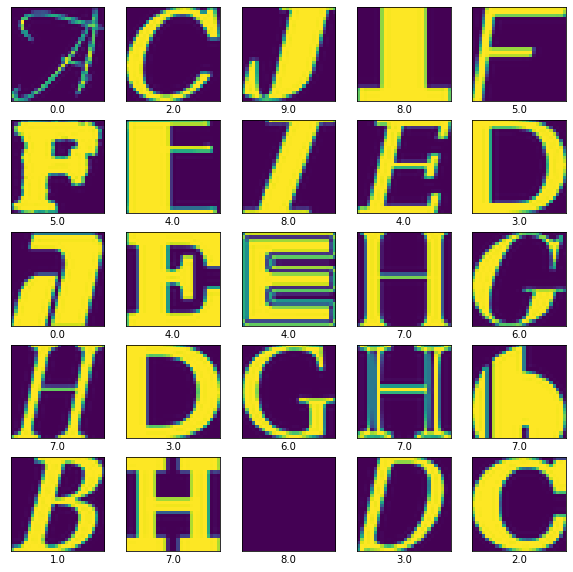

In [59]:
# 可以用下面的代码显示数据中的某张图片
# 如果不想在程序执行过程中显示图片，设置 show_single_image = False

show_single_image = False
if show_single_image:
    image_index = 0
    plt.figure()
    plt.imshow(train_images[image_index])
    plt.colorbar()
    plt.grid(False)
    plt.show()

# 显示一组图片及其标签
show_multiple_images = True
if show_multiple_images:
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i])
        plt.xlabel(str(train_labels[i]))
    plt.show()

In [60]:
# 修改图片数据用于学习。图片颜色值是0到255之间，
# 若用于神经网络模型，需要将这些值缩小至 0 到 1 之间，所以，将这些值除以 255。
train_images = train_images / 255.0
test_images = test_images / 255.0

# 增加一个颜色通道，这里是黑白图片，只需要一个通道，存储灰度信息
# 如果是RGB三色图片，则需要增加3个通道
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

# 处理分类标签数据：train_labels, train_labels
# 有10个数字，所以相当于有10个类
num_classes = 10
# 将标签向量转换成二进制向量形式，用于深度学习算法的训练
# 例如，数字5转换成了[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
#one-hot编码
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)


# 输出数据信息
print('\n-----------------------\nTraining data are loaded.')
print('Number of training images: ', num_train_images)
print('Number of testing images:  ', num_test_images)
print('Shape of train_images: ', train_images.shape)
print('Shape of test_images:  ', test_images.shape)



-----------------------
Training data are loaded.
Number of training images:  14979
Number of testing images:   3745
Shape of train_images:  (14979, 28, 28, 1)
Shape of test_images:   (3745, 28, 28, 1)


In [61]:
# -----------------------------
# 构建神经网络
# -----------------------------

# 设置层 因为学习的图片任务比较简单 没有设置过深的网络

model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        # layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
#全连接层 
# 输出模型信息
model.summary()

#  编译模型
optimizer = keras.optimizers.Adam(
        lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None)
model.compile(optimizer=optimizer, 
              loss="categorical_crossentropy",
              metrics=["accuracy"])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 24, 24, 8)         584       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 10, 10, 16)        1168      
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 8, 8, 16)          2320      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 256)              

In [62]:
# -----------------------------
# 训练模型
# -----------------------------

# 向模型溃送数据

h1=model.fit(train_images,
          train_labels,
          batch_size=32,       # 批大小
          epochs=30,            # 轮数
          validation_split=0.1 # 校验数据比例
          )

model.save('model.h5')
# 4.2 评估训练好的模型的准确率

score = model.evaluate(test_images,  test_labels, verbose=2)

# 输出准确率信息
print('-----------------------\nEvaluating the trained model.')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/30
422/422 [==============================] - 2s 4ms/step - loss: 0.8567 - accuracy: 0.7496 - val_loss: 0.5175 - val_accuracy: 0.8605
Epoch 2/30
422/422 [==============================] - 2s 4ms/step - loss: 0.4624 - accuracy: 0.8739 - val_loss: 0.4058 - val_accuracy: 0.8858
Epoch 3/30
422/422 [==============================] - 1s 4ms/step - loss: 0.3804 - accuracy: 0.8929 - val_loss: 0.3517 - val_accuracy: 0.8999
Epoch 4/30
422/422 [==============================] - 2s 4ms/step - loss: 0.3268 - accuracy: 0.9094 - val_loss: 0.3411 - val_accuracy: 0.9065
Epoch 5/30
422/422 [==============================] - 2s 4ms/step - loss: 0.2981 - accuracy: 0.9168 - val_loss: 0.2947 - val_accuracy: 0.9226
Epoch 6/30
422/422 [==============================] - 2s 4ms/step - loss: 0.2736 - accuracy: 0.9220 - val_loss: 0.3199 - val_accuracy: 0.9186
Epoch 7/30
422/422 [==============================] - 2s 4ms/step - loss: 0.2519 - accuracy: 0.9280 - val_loss: 0.2705 - val_accuracy: 0.9259
Epoch 

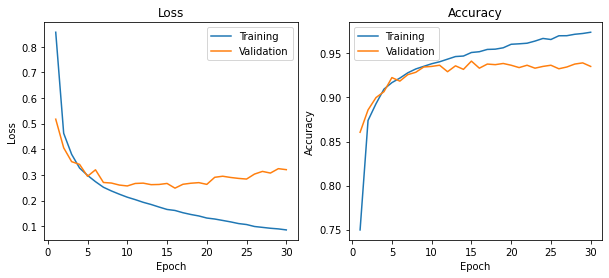

In [87]:
#训练参数显示 损失和准确率
history = h1.history
n_epochs = len(history['loss'])
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.plot(range(1, n_epochs+1), history['loss'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(1, n_epochs+1), history['accuracy'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_accuracy'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()
plt.show()      

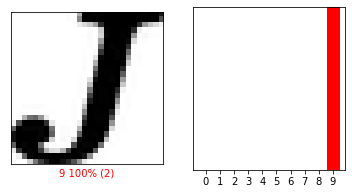

In [88]:
# -----------------------------
# 使用训练好的模型
# -----------------------------

# 进行预测

# 现在可以使用训练好的模型来预测手写数字图片
# 预测测试集中的第1和第2张图片
prediction_results = model.predict(test_images[0:2])


# prediction_results是一个包含2x10的数组，表示2张图片分别为10个类型的可能性程度
# 找出第1张图片可能性最大的那个元素，以确定是否预测正确
predicted_index = np.argmax(prediction_results[0])
# 5.2 画出预测结果
# 定义一个函数用于显示预测结果

def plot_prediction(prediction_array, true_label, img):
    # 准备图
    plt.figure(figsize=(6,3))
    img28x28 = img.reshape((28, 28))
    # 画数字图片
    plt.subplot(1, 2, 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img28x28, cmap=plt.cm.binary)
    predicted_label = np.argmax(prediction_array)
    if predicted_label == true_label: color = 'blue'
    else: color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(str(predicted_label),
                                100*np.max(prediction_array),
                                str(true_label)),
                                color=color)

    # 画预测可能性数值
    plt.subplot(1, 2, 2)
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), prediction_array, color="#777777")
    plt.ylim([0, 1])
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# 画出预测结果

plot_prediction(prediction_results[1], 2, test_images[1])
plt.show()

[INFO] Evaluation phase...
[INFO] Classification report : 
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93       356
         1.0       0.90      0.94      0.92       363
         2.0       0.94      0.96      0.95       391
         3.0       0.97      0.92      0.94       353
         4.0       0.93      0.95      0.94       370
         5.0       0.96      0.96      0.96       383
         6.0       0.94      0.93      0.93       347
         7.0       0.96      0.92      0.94       384
         8.0       0.88      0.91      0.90       404
         9.0       0.93      0.93      0.93       394

    accuracy                           0.93      3745
   macro avg       0.94      0.93      0.93      3745
weighted avg       0.94      0.93      0.93      3745

[INFO] Total wrong test_data predictions : 
245
[INFO] Confusion matrix : 


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

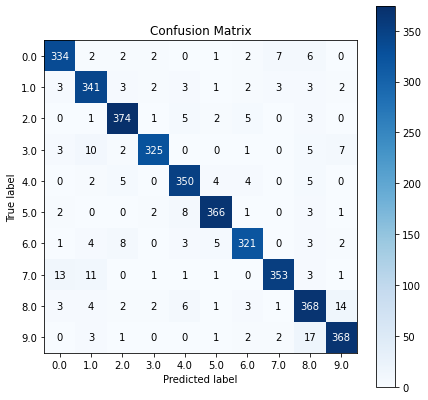

In [89]:
#模型评价 评价的几个指标 混淆矩阵 根据需要调用
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import scikitplot
print("[INFO] Evaluation phase...")

predictions = model.predict(test_images).argmax(axis=1)
#predictions=keras.utils.to_categorical(predictions, num_classes)

my_classification_report = classification_report(test_label, predictions)

print("[INFO] Classification report : ")
print(my_classification_report)

print("[INFO] Total wrong test_data predictions : ")
print(np.sum(test_label != predictions))

print("[INFO] Confusion matrix : ")
scikitplot.metrics.plot_confusion_matrix(test_label, predictions, figsize=(7,7))

In [ ]:
#存在几个问题 自己使用随机数划分数据时 不能够做到在所有类别中很均匀的取样 使得对某些字母的识别特性 有点高
#训练轮数还是要多一点 学习率等
#评估指标 根据需要调整

(3745, 26, 26, 8)


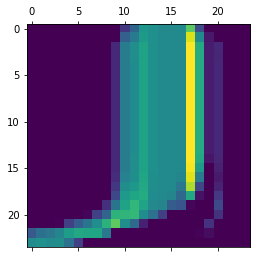

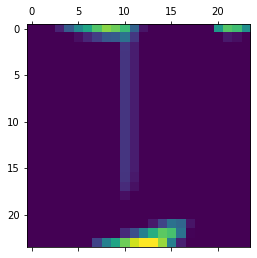

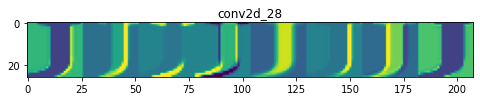

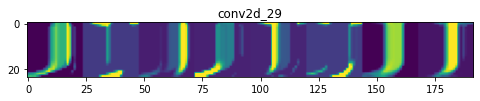

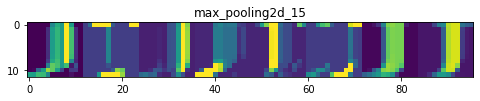

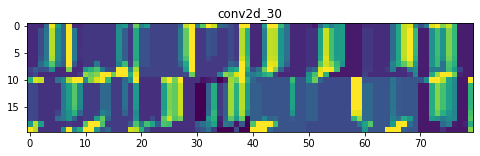

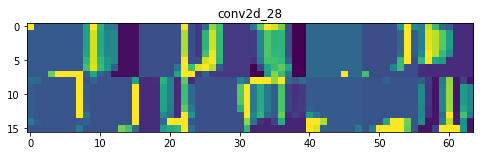

In [92]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
layer_names=list()
model=models.load_model('model.h5')
#提取前4层的输出
layer_outputs=[layer.output for layer in model.layers[:5]]
activation_model=models.Model(inputs=model.input,outputs=layer_outputs)

plt.matshow(activations[1][0,:,:,0], cmap='viridis') #第1卷积层的第1特征层输出
plt.matshow(activations[1][0,:,:,1], cmap='viridis') #第1卷积层的第0特征层输出

#以预测模式运行模型 
activations=activation_model.predict(test_images)
print(activations[0].shape)

for layer in model.layers[:5]:
    layer_names.append(layer.name) #特征层的名字

images_per_row=8

for layer_name, layer_activation in zip (layer_names[0:5], activations[0:5]):
    n_feature = layer_activation.shape[-1] # 每层输出的特征层数
    size = layer_activation.shape[1]  #每层的特征大小
    n_cols = n_feature//images_per_row #特征图平铺的行数
    display_grid = np.zeros((size*n_cols, images_per_row*size)) # 每层图片大小
    for col in range(n_cols): #行扫描
        for row in  range (images_per_row): #平铺每行
            channel_image = layer_activation[0,:,:,col*images_per_row+row] # 写入col*images_per_row+row特征层
            channel_image -= channel_image.mean() #标准化处理，增加可视化效果
            channel_image /= channel_image.std()
            channel_image *=64
            channel_image +=128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col*size:(col+1)*size, row*size:(row+1)*size] = channel_image #写入大图中
    scale = 1./size #每组图缩放系数
    plt.figure(figsize=(scale*display_grid.shape[1], scale*display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

